# Module 2 Code Challenge

Welcome to your Module 2 Code Challenge. This code challenge is designed to test your understanding of the Module 2 material. It covers:

- Statistical Distributions
- Statistical Tests
- Bayesian Statistics
- Linear Regression

_Read the instructions carefully_. You will be asked both to write code and respond to a few short answer questions.

### Note on the short answer questions: 

For the short answer questions _please use your own words_. The expectation is that you have **not** copied and pasted from an external source, even if you consult another source to help craft your response. While the short answer questions are not necessarily being assessed on grammatical correctness or sentence structure, you should do your best to communicate yourself clearly.

In [21]:
# Run this cell without changes to import the necessary libraries

# Use any additional libraries you like to complete this assessment 

import itertools
import numpy as np
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels

import pickle

from sklearn.metrics import mean_squared_error, roc_curve, roc_auc_score, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols

---
## Part 1: Statistical Distributions [Suggested time: 25 minutes]
---

### Normal Distributions

Say we have check totals for all checks ever written at a TexMex restaurant. 

The distribution for this population of check totals happens to be normally distributed with a population mean of $\mu = 20$ and population standard deviation of $\sigma = 2$. 

### 1.1) Write a function to compute the z-scores for single check of amount `check_amt`.

In [2]:
# Replace `pass` with appropriate code
def z_score(check_amt):
    """
    check_amt = the amount for which we want to compute the z-score
    """
    mu = 20
    std = 2
    z = (check_amt - mu) / std
    return z
    

### 1.2) Use your function to compute the z-score for a 24 dollar check, and interpret the result using the empirical rule. 

In [3]:
# Code here 
z_score(24)

2.0

In [ ]:
"""
The empirical rule states that approximately 95% of the data falls within two standard deviations of the mean. 
Given that the z score of $24 is exactly 2.00, it means that it is 2 standard deviations larger than the mean.
Even though the value still technically belongs within the 95% range, it is already at the borderline where its 
probability occurring is low. In fact, strictly speaking in terms of Z testing, exactly 2 standard deviations away 
from the mean is already not likely that it will not pass 95% confidence level since the the actual z threshold is 
1.96. 
"""

### 1.3) Using $\alpha = 0.05$, is the 24 dollar check significantly _greater_ than the mean? How do you know this?  

For reference, here is a link to a [z-table](https://www.math.arizona.edu/~rsims/ma464/standardnormaltable.pdf). 

In [38]:
z = z_score(24)
print(1 - stats.norm.cdf(z))

0.02275013194817921


In [ ]:
"""
It was close but yes. Because our p-value is less than alpha, we have to reject the null 
hypothesis that the 24 dollar check is equal to the mean. This means that the probability of 
getting 24 dollars in this distribution is 2.2% only, so it is indeed significantly greater.
Greater not lesser because of the positive value of z score.
"""

### Confidence Intervals and the Central Limit Theorem

### 1.4) Determine the 95% confidence interval around the mean check total for this population. Interpret your result. 

In [11]:
sigma = 2
mu = 20
z = stats.norm.ppf(q = 0.975)
pm = sigma * z


print("The 95% confidence intervals are " + str(mu) + " +/- " + str(pm) + ".")

The 95% confidence intervals are 20 +/- 3.919927969080108.


In [ ]:
"""
In a sample, the 95% confidence interval usually states that the population mean will be within the range of the 
confidence level results. But here we already have a population mean. Connecting to the Central Limit Theorem, it 
is likely that as we get more and more samples from this population, the sample means will approximate to our mean.
"""

### 1.5) Imagine that we didn't know how the population of check totals was distributed. How would _sampling_ and the _Central Limit Theorem_ allow us to make inferences on the population mean, i.e. estimate $\mu, \sigma$ of the population mean?

In [ ]:
"""
Central Limit Theorem states that as sample sizes become larger:
1. The sample means will approximate to a normal distribution even if that population distribution is not normal

Then we can infer the following since it is a normal distribution:

2. The normal distribution will have a mean close to the population mean 
3. The standard error of the sample means will be close to the standard deviation of the population divided 
by the square root of the sample size

"""

---
## Part 2: Statistical Testing [Suggested time: 15 minutes]
---

The TexMex restaurant recently introduced queso to its menu.

We have random samples of 1000 "no queso" order check totals and 1000 "queso" order check totals for orders made by different customers.

In the cell below, we load the sample data for you into the arrays `no_queso` and `queso` for the "no queso" and "queso" order check totals, respectively. Then, we create histograms of the distribution of the check amounts for the "no queso" and "queso" samples. 

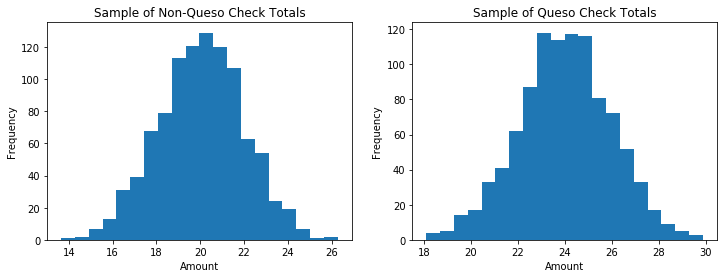

In [12]:
# Run this cell without changes

# Load the sample data 
no_queso = pickle.load(open('data/no_queso.pkl', 'rb'))
queso = pickle.load(open('data/queso.pkl', 'rb'))

# Plot histograms

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Sample of Non-Queso Check Totals')
ax1.set_xlabel('Amount')
ax1.set_ylabel('Frequency')
ax1.hist(no_queso, bins=20)

ax2.set_title('Sample of Queso Check Totals')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Frequency')
ax2.hist(queso, bins=20)
plt.show()

### Hypotheses and Errors

The restaurant owners want to know if customers who order queso spend **more or less** than customers who do not order queso.

### 2.1) Set up the null $H_{0}$ and alternative hypotheses $H_{A}$ for this test.

In [ ]:
"""
Null hypothesis (𝐻0): The bill of customers who order queso is equal to the bill of those 
who do not order queso

Alternative hypothesis (𝐻𝐴): The bill of customers who order queso is not equal to the 
bill of those who do not order queso
"""

### 2.2) What does it mean to make `Type I` and `Type II` errors in this specific context?

In [ ]:
"""
Type I error means rejecting the null hypothesis - that the bill of customers who order 
queso is equal to the bill of those who do not order queso - when it is true (the bill 
is indeed equal). 

Type II error means not rejecting the null hypothesis - that the bill of customers who 
order queso is equal to the bill of those who do not order queso - when it is false 
(the bill is not equal).
"""

### Sample Testing

### 2.3) Run a statistical test on the two samples. Can you reject the null hypothesis? 

Use a significance level of $\alpha = 0.05$. You can assume the two samples have equal variance.

You can use `scipy.stats` to find the answer if you like.  It has already been imported as `stats` and the statistical testing documentation can be found [here](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests).

In [24]:
stats.ttest_ind(a= queso,
                b= no_queso,
                equal_var=True) 

Ttest_indResult(statistic=45.16857748646329, pvalue=1.29670967092511e-307)

In [ ]:
"""
T statistic states that we are 45 standard deviations away from the mean and p-value states
that the probability of no queso bill to be equal to queso is almost close to zero. P-value is 
obviously less than the alpha value.

Therefore, we reject the null hypothesis that the bill of those who order queso and the bill
of those who do not order queso are not equal or that they have significant difference statistically.
"""

---
## Part 3: Bayesian Statistics [Suggested time: 15 minutes]
---
### Bayes' Theorem

Thomas wants to get a new puppy 🐕 🐶 🐩 


<img src="https://media.giphy.com/media/rD8R00QOKwfxC/giphy.gif" />

He can choose to get his new puppy either from the pet store or the pound. The probability of him going to the pet store is $0.2$. 

He can choose to get either a large, medium or small puppy.

If he goes to the pet store, the probability of him getting a small puppy is $0.6$. The probability of him getting a medium puppy is $0.3$, and the probability of him getting a large puppy is $0.1$.

If he goes to the pound, the probability of him getting a small puppy is $0.1$. The probability of him getting a medium puppy is $0.35$, and the probability of him getting a large puppy is $0.55$.

### 3.1) What is the probability of Thomas getting a small puppy?
Show your work, not just the final result

In [27]:
'''
P(Pet Store) = .2
P(Pound) = .8
P(Small | Pet Store) = .6
P(Medium | Pet Store) = .3
P(Large | Pet Store) = .1
P(Small | Pound) = .1
P(Medium | Pound) = .35
P(Large | Pound) = .55
'''

P = (.6 * .2) + (.1 * .8)
P

0.2

### 3.2) Given that he got a large puppy, what is the probability that Thomas went to the pet store?
Show your work, not just the final result

In [26]:
# P(Pet Store | Large)
P = .1*.2 / ((.1*.2) + (.55 * .8))
P

0.043478260869565216

### 3.3) Given that Thomas got a small puppy, is it more likely that he went to the pet store or to the pound?
Show your work, not just the final result

In [28]:
Psmallpound = .8 * .1
Psmallpetstore = .6 * .2
print(Psmallpound,Psmallpetstore)
"""
It is 4% more likely that Thomas went to the pet store to get his small puppy.
"""

0.08000000000000002 0.12


'\nWritten answer here for which is more likely\n'

### 3.4) For Question 3.2, what are the prior, posterior, and likelihood?

In [ ]:
"""
Prior Probability is P(Pet Store)
Posterior Probability is P(Pet Store | Large Puppy)
Likelihood is P(Large Puppy | Pet Store)
"""

---
## Part 4: Linear Regression [Suggested Time: 10 min]
---

In this section, you'll be using the Advertising data, and you'll be creating linear models that are more complicated than a simple linear regression. The relevant modules have already been imported at the beginning of this notebook. We'll load and prepare the dataset for you below.

In [29]:
# Run this cell without changes

data = pd.read_csv('data/advertising.csv').drop('Unnamed: 0', axis=1)
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [30]:
# Run this cell without changes

X = data.drop('sales', axis=1)
y = data['sales']

In the linear regression section of the curriculum, you analyzed how TV, Radio, and Newspaper spendings individually affected the Sales figures. Here, we'll use all three together in a multiple linear regression model!

### 4.1) Create a Correlation Matrix for `X`.

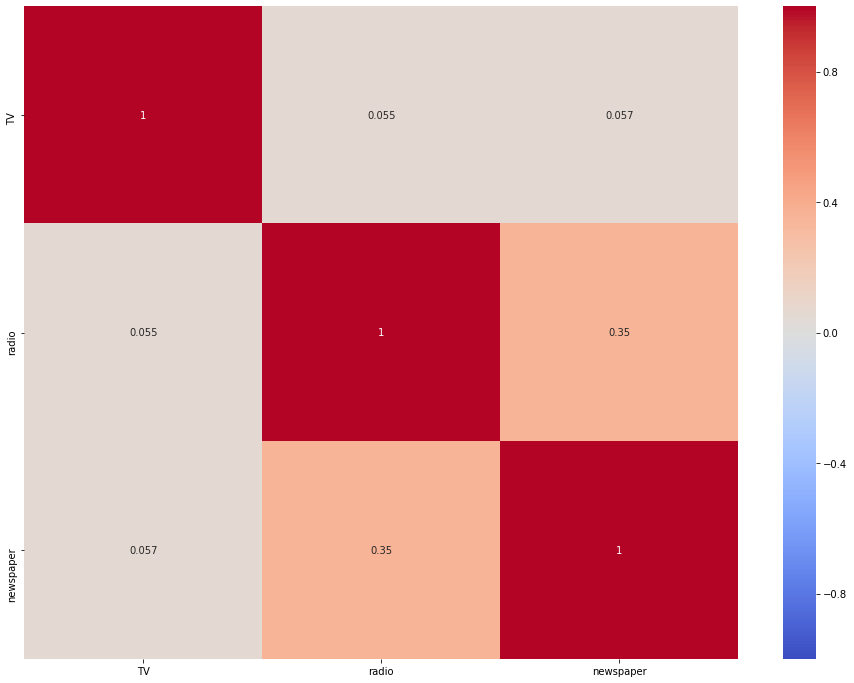

In [32]:
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(X.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

### 4.2) Based on this correlation matrix only, would you recommend to use `TV`, `radio`, and `newspaper` in the same multiple linear regression model?

In [ ]:
"""
Yes, I believe so because there is no super strong sign of auto collinearity. 
The highest correlation is .57 only.
"""

### 4.3) Use StatsModels' `ols`-function to create a multiple linear regression model with `TV`, `radio`, and `newspaper` as independent variables and `sales` as the dependent variable. 

**Required output:** the model summary of this multiple regression model.

In [34]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Thu, 19 Mar 2020   Prob (F-statistic):                   2.43e-171
Time:                        10:49:37   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
radio          0.2222      0.009     23.595      0.000       0.204       0.241
newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 4.4) Do we have any statistically significant coefficients? If the answer is yes, list them below.

In [ ]:
"""
Since the figures for each features is spending, there was no need to scale. The coefficients
are also called weights because they are the ones to be applied in actual formula
for predicting sales. Hence, the bigger the coefficient, the more statistically significant
it is in predicting sales in this context. Looking at the result, Radio has the most 
significance. Followed by TV. Last is the newspaper.
"""